In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import seaborn as sb

import utils as pic
    
%load_ext autoreload
%autoreload 2

In [8]:
scandir = 'scans/cnn3d-v2-32x32'
scancsv = list(filter(lambda f:f.endswith('.csv'),os.listdir(scandir)))
dflist = [ pd.read_csv(f"{scandir}/{csv}") for csv in scancsv ]
scancsv

['112821120018.csv',
 '112821121136.csv',
 '112821121334.csv',
 '112821161317.csv',
 '112821162910.csv',
 '112821163050.csv']

In [9]:
scandir = 'scans/cnn3d-v2-1.00e-01-9.90e-03-32x32'
scancsv = list(filter(lambda f:f.endswith('.csv'),os.listdir(scandir)))
dflist = dflist + [ pd.read_csv(f"{scandir}/{csv}") for csv in scancsv ]

scandf = pd.concat(dflist,axis=0,ignore_index=True)


In [10]:
scandf.sort_values('val_accuracy')[::-1].T

,99,1,109,20,33,40,94,91,23,67,...,51,64,85,54,60,102,78,61,101,48
round_epochs,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
loss,0.560289,0.589641,0.588785,0.60801,0.588732,0.61026,0.58715,0.579367,0.614399,0.589871,...,0.614861,0.593917,0.621767,0.635921,0.574517,0.601239,0.590327,0.566721,0.633309,0.591247
accuracy,0.72245,0.7001,0.70195,0.6787,0.7,0.6744,0.698,0.70415,0.6661,0.6984,...,0.6609,0.6907,0.6522,0.6355,0.7143,0.6857,0.6962,0.7184,0.641,0.6972
auc,NaN,0.753676,NaN,0.731486,0.753551,0.728687,NaN,NaN,0.722744,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val_loss,0.637605,0.611736,0.657715,0.627668,0.637597,0.631453,0.636845,0.646477,0.631625,0.722145,...,0.970795,0.735823,1.095394,1.130466,1.497217,0.7185,0.769832,1.033015,2.994103,0.820084
val_accuracy,0.6916,0.6806,0.669,0.6672,0.6643,0.6567,0.6541,0.65305,0.6519,0.6503,...,0.4998,0.4997,0.4994,0.4974,0.4944,0.4941,0.4637,0.4552,0.44855,0.4441
val_auc,NaN,0.730228,NaN,0.711523,0.703208,0.705951,NaN,NaN,0.700212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,0.000001,0.000001,0.000001,0.000002,0.000001,0.000002,0.000002,0.000002,0.000002,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
activation,elu,elu,elu,elu,elu,elu,relu,elu,elu,elu,...,elu,elu,elu,elu,elu,elu,elu,elu,elu,elu
nfilters_1,64,64,64,64,64,96,32,64,64,32,...,32,32,32,32,32,64,32,32,32,32


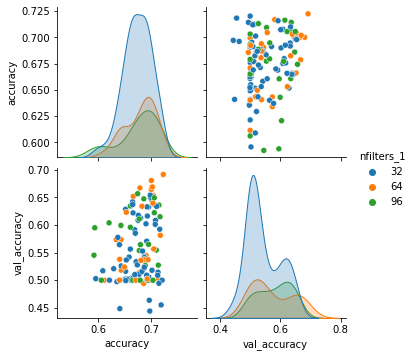

In [12]:
sb.pairplot(scandf,vars=['accuracy','val_accuracy'],palette='tab10',hue='nfilters_1')